<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/sk%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
import numpy as np
import io
MyTrainset = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [3]:
MyTrainset 

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect,status
0,HDDSN00000,CRSTR01L,2015-03-09 09:36:00,EGRWT0113,2015-03-09 11:33:55,4561.0,6083.0,1341.0,pass
1,HDDSN00001,CRSTR01Q,2015-03-10 02:13:00,EGRWT0102,2015-03-10 03:16:18,3898.0,1819.0,8037.0,pass
2,HDDSN00002,CRSTR01N,2015-03-06 23:06:00,EGRWT0103,2015-03-07 00:00:12,3016.0,4997.0,1583.0,pass
3,HDDSN00003,CRSTR01A,2015-03-08 05:10:00,EGRWT0107,2015-03-08 06:36:18,1605.0,4415.0,3345.0,pass
4,HDDSN00004,CRSTR01C,2015-03-09 06:44:00,EGRWT0113,2015-03-09 09:13:40,1002.0,2394.0,3296.0,pass
...,...,...,...,...,...,...,...,...,...
31995,HDDSN39991,CRSTR01Q,2015-03-08 06:02:00,EGRWT0110,2015-03-08 07:31:54,1303.0,2796.0,2057.0,pass
31996,HDDSN39993,CRSTR01O,2015-03-07 13:06:00,EGRWT0102,2015-03-07 14:03:08,3036.0,5538.0,2382.0,fail
31997,HDDSN39994,CRSTR01C,2015-03-08 16:14:00,EGRWT0108,2015-03-08 18:55:56,2954.0,3607.0,3133.0,fail
31998,HDDSN39997,CRSTR01T,2015-03-05 13:11:00,EGRWT0109,2015-03-05 15:21:58,1133.0,3279.0,2410.0,pass


In [34]:
df_x = MyTrainset.loc[:,(MyTrainset.columns != 'status') & (MyTrainset.columns != 'ID') & (MyTrainset.columns != 'cr_ID') & (MyTrainset.columns != 'eq_ID')& (MyTrainset.columns != 'assembly_time')& (MyTrainset.columns != 'process_time')]
df_y = MyTrainset.loc[:,'status']

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
cr_ID = MyTrainset.loc[:,'cr_ID']
encoder.fit(cr_ID)
cr_ID = encoder.transform(cr_ID)
cr_ID = pd.DataFrame(cr_ID)
cr_ID.columns = ['cr_ID']
cr_ID

In [ ]:
eq_ID = MyTrainset.loc[:,'eq_ID']
encoder.fit(eq_ID)
eq_ID = encoder.transform(eq_ID)
eq_ID = pd.DataFrame(eq_ID)
eq_ID.columns = ['eq_ID']
eq_ID

In [8]:
assembly_time = MyTrainset.loc[:,'assembly_time']
assembly_time

0        2015-03-09 09:36:00
1        2015-03-10 02:13:00
2        2015-03-06 23:06:00
3        2015-03-08 05:10:00
4        2015-03-09 06:44:00
                ...         
31995    2015-03-08 06:02:00
31996    2015-03-07 13:06:00
31997    2015-03-08 16:14:00
31998    2015-03-05 13:11:00
31999    2015-03-08 05:31:00
Name: assembly_time, Length: 32000, dtype: object

In [9]:
process_time = MyTrainset.loc[:,'process_time']
process_time

0        2015-03-09 11:33:55
1        2015-03-10 03:16:18
2        2015-03-07 00:00:12
3        2015-03-08 06:36:18
4        2015-03-09 09:13:40
                ...         
31995    2015-03-08 07:31:54
31996    2015-03-07 14:03:08
31997    2015-03-08 18:55:56
31998    2015-03-05 15:21:58
31999    2015-03-08 06:55:14
Name: process_time, Length: 32000, dtype: object

In [10]:
assembly_time = pd.to_datetime(assembly_time, format="%Y/%m/%d %H:%M:%S")
process_time = pd.to_datetime(process_time, format="%Y/%m/%d %H:%M:%S")

In [11]:
from datetime import datetime

In [12]:
generalTime = datetime(2015,3,1,0,0,0)
print(generalTime)

2015-03-01 00:00:00


In [ ]:
m_assembly_time = assembly_time - generalTime
m_assembly_time = m_assembly_time.dt.days*86400+m_assembly_time.dt.seconds
m_assembly_time = pd.DataFrame(m_assembly_time)
m_assembly_time.columns = ['m_assembly_time']
m_assembly_time

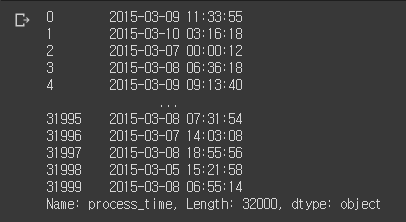

In [14]:
m_process_time = process_time - generalTime
m_process_time = m_process_time.dt.days*86400+m_process_time.dt.seconds
m_process_time = pd.DataFrame(m_process_time)
m_process_time.columns = ['m_process_time']
m_process_time

,m_process_time
0,732835
1,789378
2,518412
3,628578
4,724420
...,...
31995,631914
31996,568988
31997,672956
31998,400918


In [15]:
timeDiffer = process_time - assembly_time
timeDiffer = timeDiffer.dt.seconds
timeDiffer = pd.DataFrame(timeDiffer)
timeDiffer.columns = ['timeDiffer']
timeDiffer

,timeDiffer
0,7075
1,3798
2,3252
3,5178
4,8980
...,...
31995,5394
31996,3428
31997,9716
31998,7858


In [ ]:
ramp = MyTrainset.loc[:,'ramp']
servo = MyTrainset.loc[:,'servo_defect']
data = MyTrainset.loc[:,'data_defect']

In [19]:
rampServo = servo - ramp
rampServo = pd.DataFrame(rampServo)
rampServo.columns = ['rampServo']

rampData = servo - data
rampData = pd.DataFrame(rampData)
rampData.columns = ['rampData']

servoData = data - servo
servoData = pd.DataFrame(servoData)
servoData.columns = ['servoData']

In [35]:
df_x = pd.concat([df_x,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time], axis=1)
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420
...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918


In [29]:
tmp_x = []
tmp_x = pd.concat([df_x,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,rampServo,rampData], axis=1)
tmp_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,rampServo,rampData
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,1522.0,4742.0
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,-2079.0,-6218.0
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,1981.0,3414.0
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,2810.0,1070.0
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,1392.0,-902.0
...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,1493.0,739.0
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,2502.0,3156.0
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,653.0,474.0
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,2146.0,869.0


In [124]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier #
from sklearn.model_selection import StratifiedKFold, KFold #
from sklearn.svm import SVC

In [125]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv

     |████████████████████████████████| 65.8MB 43kB/s 


In [ ]:
results = []
names = []
scoring = 'accuracy'
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB',XGBClassifier()))
#models.append(('lr',LogisticRegression()))
#models.append(('cb',CatBoostClassifier()))
for name, model in models:
  kfold= model_selection.KFold(n_splits=5, shuffle=True)
  cv_results= model_selection.cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
  print(msg)

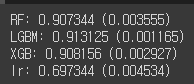

In [46]:
from scipy.stats import mode

In [38]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=5):
  kfold = KFold(n_splits = n_folds)

  train_fold_predict = np.zeros((X_train.shape[0], 1),str)
  
  test_predict = np.zeros((X_test.shape[0], n_folds),str)
  print("model : ", model.__class__.__name__)

  for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_train_ = X_train.iloc[train_index]
    y_train_ = y_train.iloc[train_index]
    X_validation = X_train.iloc[valid_index]

    
    #학습
    model.fit(X_train_, y_train_)
    
    #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validaton)로 예측 후 저장
    train_fold_predict[valid_index, :] = model.predict(X_validation).reshape(-1, 1)
    
    #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
    test_predict[:, cnt] = model.predict(X_test)
  #print(test_predict.shape)
  #print(test_predict)
  tmp = np.zeros((len(test_predict),1),str)
  
  for i in range(0,len(test_predict)):
    tmp[i] = mode(test_predict[i])[0]
  print(tmp.shape)
  #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
  test_predict_mean = tmp

  return train_fold_predict, test_predict_mean

In [47]:
rf_train, rf_test = get_stacking_data(RandomForestClassifier(), df_x, df_y, test_x)
xgb_train, xgb_test = get_stacking_data(XGBClassifier(), df_x, df_y, test_x)
lgbm_train, lgbm_test = get_stacking_data(LGBMClassifier(), df_x, df_y, test_x)

model :  RandomForestClassifier
(8000, 1)
model :  XGBClassifier
(8000, 1)
model :  LGBMClassifier
(8000, 1)


In [78]:
new_X_train = np.concatenate((rf_train, xgb_train, lgbm_train), axis = 1)
new_X_test = np.concatenate((rf_test, xgb_test, lgbm_test), axis = 1)

In [91]:
new_X_test = pd.DataFrame(new_X_test)
new_X_test

,0,1,2
0,p,p,p
1,p,p,p
2,p,p,p
3,p,p,p
4,f,f,f
...,...,...,...
7995,p,p,p
7996,f,f,f
7997,p,p,p
7998,f,f,f


In [101]:
for i in range(0,3):
  for j in range(8000):
    if new_X_test[i][j] == 'p':
      new_X_test[i][j] = "pass"
    else:
      new_X_test[i][j] = "fail"
new_X_test

,0,1,2
0,pass,pass,pass
1,pass,pass,pass
2,pass,pass,pass
3,pass,pass,pass
4,fail,fail,fail
...,...,...,...
7995,pass,pass,pass
7996,fail,fail,fail
7997,pass,pass,pass
7998,fail,fail,fail


In [118]:
result = pd.DataFrame(index=range(0,8000),columns=['status'])
#result[0] = 'pass'
type(result)

pandas.core.frame.DataFrame

In [119]:
result = pd.DataFrame(index=range(0,8000),columns=['status'])
for i in range(0,8000):
  result.iloc[i] = mode(new_X_test.iloc[i,:])[0]
result

,status
0,pass
1,pass
2,pass
3,pass
4,fail
...,...
7995,pass
7996,fail
7997,pass
7998,fail


In [122]:
pd.DataFrame(pred_y)

,0
0,pass
1,pass
2,pass
3,pass
4,fail
...,...
7995,pass
7996,fail
7997,pass
7998,fail


In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [40]:
uploaded = files.upload()

Saving test.csv to test.csv


In [41]:
testset = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [ ]:
testset

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect
0,HDDSN00014,CRSTR01A,2015-03-08 11:47:00,EGRWT0107,2015-03-08 12:13:12,1518.0,5784.0,1620.0
1,HDDSN00020,CRSTR01O,2015-03-11 10:14:00,EGRWT0113,2015-03-11 12:03:49,1070.0,4998.0,3565.0
2,HDDSN00021,CRSTR01P,2015-03-08 04:32:00,EGRWT0104,2015-03-08 05:20:31,1008.0,3812.0,2760.0
3,HDDSN00025,CRSTR01I,2015-03-09 19:13:00,EGRWT0114,2015-03-09 20:37:23,1041.0,5628.0,1349.0
4,HDDSN00029,CRSTR01R,2015-03-07 17:33:00,EGRWT0111,2015-03-07 18:16:33,2150.0,4150.0,3704.0
...,...,...,...,...,...,...,...,...
7995,HDDSN39990,CRSTR01F,2015-03-10 05:54:00,EGRWT0114,2015-03-10 07:42:16,1163.0,3712.0,5631.0
7996,HDDSN39992,CRSTR01O,2015-03-05 08:07:00,EGRWT0100,2015-03-05 09:38:56,1028.0,4102.0,5473.0
7997,HDDSN39995,CRSTR01J,2015-03-11 03:24:00,EGRWT0113,2015-03-11 04:55:11,1202.0,5214.0,2631.0
7998,HDDSN39996,CRSTR01B,2015-03-07 10:42:00,EGRWT0113,2015-03-07 12:46:48,2400.0,5133.0,7505.0


In [42]:
test_x = testset.loc[:,(testset.columns != 'ID') & (testset.columns != 'cr_ID') & (testset.columns != 'eq_ID')& (testset.columns != 'assembly_time')& (testset.columns != 'process_time')]
test_cr_ID = testset.loc[:,'cr_ID']

encoder.fit(test_cr_ID)
test_cr_ID = encoder.transform(test_cr_ID)
test_cr_ID = pd.DataFrame(test_cr_ID)
test_cr_ID.columns = ['cr_ID']

test_eq_ID = testset.loc[:,'eq_ID']
encoder.fit(test_eq_ID)
test_eq_ID = encoder.transform(test_eq_ID)
test_eq_ID = pd.DataFrame(test_eq_ID)
test_eq_ID.columns = ['eq_ID']

test_assembly_time = testset.loc[:,'assembly_time']
test_process_time = testset.loc[:,'process_time']

test_assembly_time = pd.to_datetime(test_assembly_time, format="%Y/%m/%d %H:%M:%S")
test_process_time = pd.to_datetime(test_process_time, format="%Y/%m/%d %H:%M:%S")

test_m_assembly_time = test_assembly_time - generalTime
test_m_assembly_time = test_m_assembly_time.dt.days*86400+test_m_assembly_time.dt.seconds
test_m_assembly_time = pd.DataFrame(test_m_assembly_time)
test_m_assembly_time.columns = ['m_assembly_time']

test_m_process_time = test_process_time - generalTime
test_m_process_time = test_m_process_time.dt.days*86400+test_m_process_time.dt.seconds
test_m_process_time = pd.DataFrame(test_m_process_time)
test_m_process_time.columns = ['m_process_time']

test_timeDiffer = test_process_time - test_assembly_time
test_timeDiffer = test_timeDiffer.dt.seconds
test_timeDiffer = pd.DataFrame(test_timeDiffer)
test_timeDiffer.columns = ['timeDiffer']

test_x = pd.concat([test_x,test_cr_ID,test_eq_ID,test_timeDiffer,test_m_assembly_time,test_m_process_time], axis=1)

In [44]:
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420
...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918


In [43]:
test_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time
0,1518.0,5784.0,1620.0,0,7,1572,647220,648792
1,1070.0,4998.0,3565.0,14,13,6589,900840,907429
2,1008.0,3812.0,2760.0,15,4,2911,621120,624031
3,1041.0,5628.0,1349.0,8,14,5063,760380,765443
4,2150.0,4150.0,3704.0,17,11,2613,581580,584193
...,...,...,...,...,...,...,...,...
7995,1163.0,3712.0,5631.0,5,14,6496,798840,805336
7996,1028.0,4102.0,5473.0,14,0,5516,374820,380336
7997,1202.0,5214.0,2631.0,9,13,5471,876240,881711
7998,2400.0,5133.0,7505.0,1,13,7488,556920,564408


In [120]:
model = LGBMClassifier()
model.fit(df_x, df_y)
pred_y = model.predict(test_x)

In [ ]:
a = pd.DataFrame(pred_y)
a.to_csv("배수민.csv", index = False, header = False)

In [ ]:
import xlwt, xlrd

In [ ]:
file_name = '배수민.xls'

In [ ]:
wb = xlwt.Workbook()

In [ ]:
ws_1 = wb.add_sheet('sheet0',cell_overwrite_ok=False)

In [ ]:
ws_1 = wb.get_sheet(0)

In [ ]:
idx = 0

In [ ]:
#ws_1.write(0,0,'a')
for i in range(0,len(pred_y)):
  ws_1.write(idx,0,pred_y[i])
  idx+=1

In [ ]:
wb.save(file_name)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>